<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance (2nd ed.)

**Mastering Data-Driven Finance**

&copy; Dr. Yves J. Hilpisch | The Python Quants GmbH

<img src="http://hilpisch.com/images/py4fi_2nd_shadow.png" width="300px" align="left">

# Trading Platform

## Risk Disclaimer

<font size="-1">
Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits. Leverage can work against you. Due to the certain restrictions imposed by the local law and regulation, German resident retail client(s) could sustain a total loss of deposited funds but are not subject to subsequent payment obligations beyond the deposited funds. Be aware and fully understand all risks associated with the market and trading. Prior to trading any products, carefully consider your financial situation and experience level. Any opinions, news, research, analyses, prices, or other information is provided as general market commentary, and does not constitute investment advice. FXCM & TPQ will not accept liability for any loss or damage, including without limitation to, any loss of profit, which may arise directly or indirectly from use of or reliance on such information.
</font>

## Author Disclaimer

The author is neither an employee, agent nor representative of FXCM and is therefore acting independently. The opinions given are their own, constitute general market commentary, and do not constitute the opinion or advice of FXCM or any form of personal or investment advice. FXCM assumes no responsibility for any loss or damage, including but not limited to, any loss or gain arising out of the direct or indirect use of this or any other content. Trading forex/CFDs on margin carries a high level of risk and may not be suitable for all investors as you could sustain losses in excess of deposits.

## Retrieving Tick Data

In [1]:
import time
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [4]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [5]:
start = dt.datetime(2018, 6, 25)  
stop = dt.datetime(2018, 6, 30)  

In [6]:
td = tdr('EURUSD', start, stop)  

In [7]:
td.get_raw_data().info()  

<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9+ MB


In [8]:
td.get_data().info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963779 entries, 2018-06-24 21:00:12.290000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9 MB


In [9]:
td.get_data().head()

,Bid,Ask
2018-06-24 21:00:12.290,1.1662,1.16660
2018-06-24 21:00:16.046,1.1662,1.16650
2018-06-24 21:00:22.846,1.1662,1.16658
2018-06-24 21:00:22.907,1.1662,1.16660
2018-06-24 21:00:23.441,1.1662,1.16663


In [10]:
sub = td.get_data(start='2018-06-29 12:00:00',
                  end='2018-06-29 12:15:00')  

In [11]:
sub.head()

,Bid,Ask
2018-06-29 12:00:00.011,1.16497,1.16498
2018-06-29 12:00:00.071,1.16497,1.16497
2018-06-29 12:00:00.079,1.16497,1.16498
2018-06-29 12:00:00.091,1.16495,1.16498
2018-06-29 12:00:00.205,1.16496,1.16498


In [12]:
sub['Mid'] = sub.mean(axis=1)  

In [13]:
sub['SMA'] = sub['Mid'].rolling(1000).mean()  

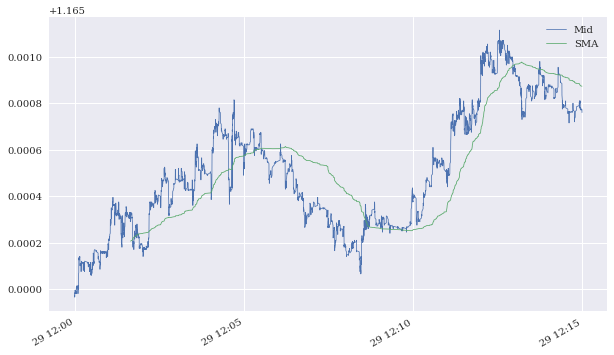

In [14]:
sub[['Mid', 'SMA']].plot(figsize=(10, 6), lw=0.75);
# plt.savefig('../../images/ch14/fxcm_plot_01.png')

## Retrieving Candles Data

In [15]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [16]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [17]:
start = dt.datetime(2018, 5, 1)
stop = dt.datetime(2018, 6, 30)

`period` must be one of `m1`, `H1` or `D1`

In [18]:
period = 'H1'  

In [19]:
candles = cdr('EURUSD', start, stop, period)

In [20]:
data = candles.get_data()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1080 entries, 2018-04-29 21:00:00 to 2018-06-29 20:00:00
Data columns (total 8 columns):
BidOpen     1080 non-null float64
BidHigh     1080 non-null float64
BidLow      1080 non-null float64
BidClose    1080 non-null float64
AskOpen     1080 non-null float64
AskHigh     1080 non-null float64
AskLow      1080 non-null float64
AskClose    1080 non-null float64
dtypes: float64(8)
memory usage: 75.9 KB


In [22]:
data[data.columns[:4]].tail()  

,BidOpen,BidHigh,BidLow,BidClose
2018-06-29 16:00:00,1.16768,1.16820,1.16731,1.16769
2018-06-29 17:00:00,1.16769,1.16826,1.16709,1.16781
2018-06-29 18:00:00,1.16781,1.16816,1.16668,1.16684
2018-06-29 19:00:00,1.16684,1.16792,1.16638,1.16774
2018-06-29 20:00:00,1.16774,1.16904,1.16758,1.16816


In [23]:
data[data.columns[4:]].tail()  

,AskOpen,AskHigh,AskLow,AskClose
2018-06-29 16:00:00,1.16769,1.16820,1.16732,1.16771
2018-06-29 17:00:00,1.16771,1.16827,1.16711,1.16782
2018-06-29 18:00:00,1.16782,1.16817,1.16669,1.16686
2018-06-29 19:00:00,1.16686,1.16794,1.16640,1.16775
2018-06-29 20:00:00,1.16775,1.16907,1.16760,1.16861


In [24]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)  

In [25]:
data['SMA1'] = data['MidClose'].rolling(30).mean()  
data['SMA2'] = data['MidClose'].rolling(100).mean()  

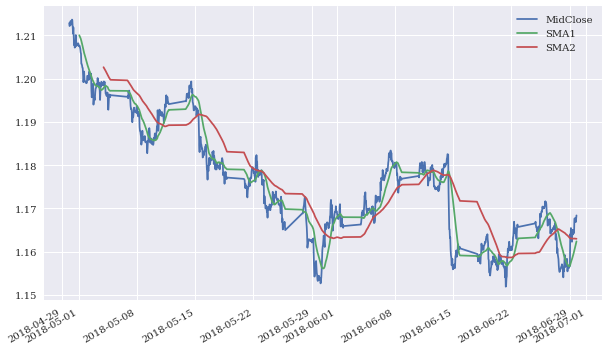

In [26]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10, 6));
# plt.savefig('../../images/ch14/fxcm_plot_02.png')

## Connecting to the API

In [27]:
import fxcmpy

In [28]:
fxcmpy.__version__

'1.1.34'

In [ ]:
api = fxcmpy.fxcmpy(config_file='../../cfg/fxcm.cfg')  

In [30]:
instruments = api.get_instruments()

In [31]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'Bund', 'XAU/USD', 'XAG/USD']


## Retrieving Historical Data

In [32]:
candles = api.get_candles('USD/JPY', period='D1', number=10)  

In [33]:
candles[candles.columns[:4]]  

,bidopen,bidclose,bidhigh,bidlow
date,,,,
2018-07-12 21:00:00,112.014,112.534,112.627,111.915
2018-07-13 21:00:00,112.534,112.330,112.801,112.276
2018-07-15 21:00:00,112.330,112.200,112.364,112.100
2018-07-16 21:00:00,112.200,112.272,112.562,112.198
2018-07-17 21:00:00,112.272,112.871,112.925,112.228
2018-07-18 21:00:00,112.871,112.835,113.138,112.710
2018-07-19 21:00:00,112.835,112.462,113.176,112.064
2018-07-20 21:00:00,112.462,111.422,112.623,111.382
2018-07-22 21:00:00,111.360,111.380,111.392,111.165


In [34]:
candles[candles.columns[4:]]  

,askopen,askclose,askhigh,asklow,tickqty
date,,,,,
2018-07-12 21:00:00,112.028,112.547,112.628,111.919,302016
2018-07-13 21:00:00,112.547,112.343,112.802,112.278,252161
2018-07-15 21:00:00,112.343,112.242,112.399,112.118,547
2018-07-16 21:00:00,112.242,112.302,112.565,112.217,200248
2018-07-17 21:00:00,112.302,112.892,112.926,112.228,286666
2018-07-18 21:00:00,112.892,112.845,113.139,112.711,251874
2018-07-19 21:00:00,112.845,112.477,113.179,112.065,313821
2018-07-20 21:00:00,112.477,111.481,112.625,111.388,413345
2018-07-22 21:00:00,111.400,111.396,111.402,111.186,563


In [35]:
start = dt.datetime(2017, 1, 1)  
end = dt.datetime(2018, 1, 1)  

In [36]:
candles = api.get_candles('EUR/GBP', period='D1',
                          start=start, stop=end)  

In [37]:
candles.info()  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2017-01-03 22:00:00 to 2018-01-01 22:00:00
Data columns (total 9 columns):
bidopen     309 non-null float64
bidclose    309 non-null float64
bidhigh     309 non-null float64
bidlow      309 non-null float64
askopen     309 non-null float64
askclose    309 non-null float64
askhigh     309 non-null float64
asklow      309 non-null float64
tickqty     309 non-null int64
dtypes: float64(8), int64(1)
memory usage: 24.1 KB


The parameter `period` must be one of `m1, m5, m15, m30, H1, H2, H3, H4, H6, H8, D1, W1` or `M1`.

In [38]:
candles = api.get_candles('EUR/USD', period='m1', number=250)  

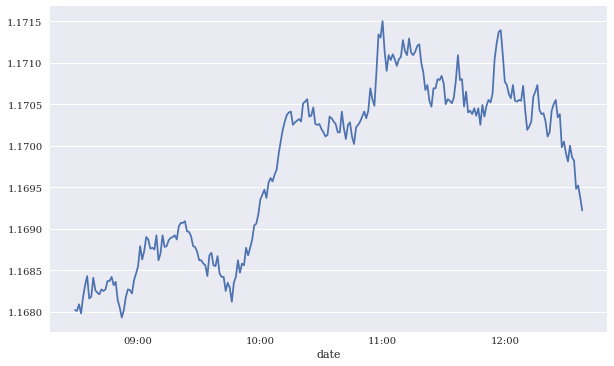

In [39]:
candles['askclose'].plot(figsize=(10, 6))
# plt.savefig('../../images/ch14/fxcm_plot_03.png');

## Streaming Data

In [40]:
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f' 
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'), 
             data['Rates'][0], data['Rates'][1]))  

In [41]:
api.subscribe_market_data('EUR/USD', (output,))  

  1 | EUR/USD | 2018-07-24 12:40:06.370000 | 1.16941, 1.16943
  2 | EUR/USD | 2018-07-24 12:40:06.950000 | 1.16941, 1.16942
  3 | EUR/USD | 2018-07-24 12:40:07.999000 | 1.16938, 1.16939
  4 | EUR/USD | 2018-07-24 12:40:08.282000 | 1.16937, 1.16939
  5 | EUR/USD | 2018-07-24 12:40:08.988000 | 1.16939, 1.16941
  6 | EUR/USD | 2018-07-24 12:40:09.479000 | 1.16941, 1.16943


In [42]:
api.get_last_price('EUR/USD')  

Bid     1.16941
Ask     1.16943
High    1.17169
Low     1.16546
Name: 2018-07-24 12:40:09.479000, dtype: float64

In [43]:
api.unsubscribe_market_data('EUR/USD')  

  7 | EUR/USD | 2018-07-24 12:40:10.007000 | 1.16940, 1.16943


## Placing Orders

In [44]:
api.get_open_positions()  

""


In [45]:
order = api.create_market_buy_order('EUR/USD', 100)  

In [46]:
sel = ['tradeId', 'amountK', 'currency',
       'grossPL', 'isBuy']  

In [47]:
api.get_open_positions()[sel]  

,tradeId,amountK,currency,grossPL,isBuy
0,61471172,100,EUR/USD,-2,True


In [48]:
order = api.create_market_buy_order('EUR/GBP', 50)  

In [49]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,61471172,100,EUR/USD,1.00000,True
1,61471174,50,EUR/GBP,-3.27961,True


In [50]:
order = api.create_market_sell_order('EUR/USD', 25)  

In [51]:
order = api.create_market_buy_order('EUR/GBP', 50)  

In [52]:
api.get_open_positions()[sel]  

,tradeId,amountK,currency,grossPL,isBuy
0,61471174,50,EUR/GBP,-3.93560,True
1,61471213,75,EUR/USD,2.25000,True
2,61471177,50,EUR/GBP,-1.31187,True


In [53]:
api.close_all_for_symbol('EUR/GBP')  

In [54]:
api.get_open_positions()[sel]

,tradeId,amountK,currency,grossPL,isBuy
0,61471213,75,EUR/USD,6,True


In [55]:
api.close_all()  

In [56]:
api.get_open_positions()

""


## Account Information

In [57]:
api.get_default_account()  

988162

In [58]:
api.get_accounts().T  

,0
accountId,988162
accountName,1000988162
balance,42711.8
dayPL,85.2
equity,42711.8
grossPL,0
hedging,N
mc,N
mcDate,
ratePrecision,0


<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>